In [ ]:
import numpy as np
import sympy
from sympy import S, Symbol, symbols, Function, dsolve, solveset, plot_implicit, integrate, diff, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt
%matplotlib inline

## Занятие 17
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
## Задание № 1
Решить аналитически ОДУ с разделяющимися переменными
$$
y'=\ln(x+2)e^{2-y}.
$$
Найти общий интеграл. 

In [ ]:
x, y = symbols('x y', real=True)
C = Symbol('C', positive=True)
ODE1 = sympy.Eq(integrate(Exp(y - 2), y), integrate(sympy.log(x + 2), x) + C)
display(ODE1)
ODE1y = sympy.Eq(y, *sympy.solve(ODE1, y, domain=S.Reals))
display(ODE1y)

Eq(exp(y - 2), C + x*log(x + 2) - x + 2*log(x + 2))

Eq(y, log(C + x*log(x + 2) - x + 2*log(x + 2)) + 2)

## Задание № 2
Решить аналитически задачу Коши
$$
y^3y'=\frac{1}{1+x^2},\qquad y(0)=1.
$$
Найти общий интеграл, учесть начальное условие. 
Построить график $y$, пользуясь plot_implicit.

Eq(y**4/4, C + atan(x))

Eq(y**4/4, atan(x) + 1/4)

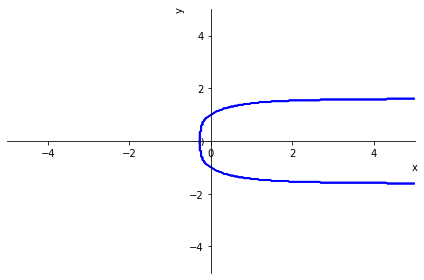

In [ ]:
x, y, C = symbols('x y C', real=True)
ODE2 = sympy.Eq(integrate(y ** 3, y), integrate(1 / (1 + x ** 2), x) + C)
display(ODE2)
Cval = solveset(ODE2.subs({x: 0, y: 1}), C)
ODE2 = ODE2.subs({C: [*Cval][0]})
display(ODE2)
plot_implicit(ODE2, adaptive=False)

## Индивидуальное задание
Решить задачу Коши аналитически, методом Эйлера и методом Рунге-Кутты. Построить в одной координатной плоскости графики точного и приближенных решений.


Вариант 2

$$\frac{d}{d x} y{\left(x \right)} = 2 \sqrt{x} y{\left(x \right)} - 9 \sqrt{x},\qquad y(0)=-9$$

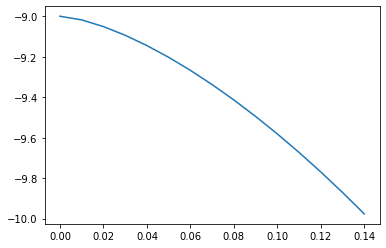

In [ ]:
def method_1():
  x, y, C1 = symbols('x y C1', real=True)
  y = Function('y')
  Y = dsolve(sympy.Eq(y(x).diff(x), 2 * y(x) * sympy.sqrt(x) - 9 * sympy.sqrt(x))).rhs
  C1val = solveset(sympy.Eq(Y.subs({x: 0}), -9), [*Y.subs({x: 0, y: -9}).free_symbols][0])
  Y = Y.subs({[*Y.subs({x: 0, y: -9}).free_symbols][0]: [*C1val][0]})
  X = [x / 100 for x in range(0, 15)]
  Ys = []
  for i in range(len(X)):
    Ys.append(Y.subs({[*Y.free_symbols][0]: X[i]}))
  return((X, Ys))
  
X, Y = method_1()
plt.plot(X, Y)

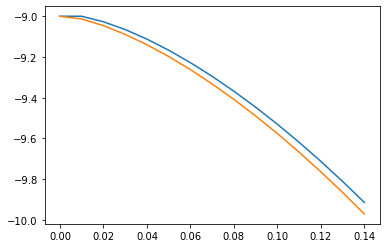

In [ ]:
def f(x, y):
  return(2 * sympy.sqrt(x) * y - 9 * sympy.sqrt(x))
  
def method_2():
  X = [0]
  Y = [-9]
  h = 0.01
  for i in range(1, 15):
    y = Y[len(Y) - 1] + h * f(X[len(X) - 1], Y[len(Y) - 1])
    X.append(X[len(X) - 1] + h)
    Y.append(y)
  return((X, Y))

def method_3():
  X = [0]
  Y = [-9]
  h = 0.01
  for i in range(1, 15):
    y_s = Y[len(Y) - 1] + h * f(X[len(X) - 1], Y[len(Y) - 1])
    y = Y[len(Y) - 1] + h * (f(X[len(X) - 1], Y[len(Y) - 1]) + f(X[len(X) - 1] + h, y_s)) / 2
    X.append(X[len(X) - 1] + h)
    Y.append(y)
  return((X, Y))

X, Y = method_2()
plt.plot(X, Y)

X, Y = method_3()
plt.plot(X, Y)

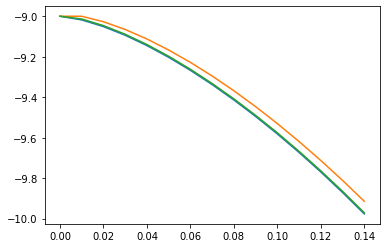

In [ ]:
X, Y = method_1()
plt.plot(X, Y)

X, Y = method_2()
plt.plot(X, Y)

X, Y = method_3()
plt.plot(X, Y)

In [ ]:
x, y, C = symbols('x y C', real=True)
ODE2 = sympy.Eq(integrate(1 / (2 * y - 9), y), integrate(sympy.sqrt(x), x) + C)
Y = sympy.Eq(y, [*sympy.solveset(ODE2, y)][0])
display(Y)
display(Y.subs({x: 0, y: -9}))
#Cval = solveset(Y.subs({x: 0, y: -9}), C)
#display(*Cval)
#ODE2 = ODE2.subs({C: [*Cval][0]})
#display(ODE2)
#plot_implicit(ODE2, (x, -2, 5), (y, -3, 3), adaptive=False)

Eq(y, exp(2*C + 4*x**(3/2)/3)/2 + 9/2)

False